# Start

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
import random
import seaborn as sns

## Data Preprocessing

In [2]:
waveOne = pd.read_csv("Data/covid_wave1_data.csv")
waveTwo = pd.read_csv("Data/covid_wave2_data.csv")
waveThree = pd.read_csv("Data/covid_wave3_data.csv")
waveFour = pd.read_csv("Data/covid_wave4_data.csv")

In [3]:
waveOne = waveOne.drop(['Unnamed: 0'], axis=1)
waveOne

,fips,County Name,cases,deaths
0,36001,Albany County,2503,115
1,36003,Allegany County,74,2
2,36005,Bronx County,49573,4853
3,36007,Broome County,1037,72
4,36009,Cattaraugus County,158,6
...,...,...,...,...
57,36115,Washington County,254,14
58,36117,Wayne County,245,2
59,36119,Westchester County,35933,1445
60,36121,Wyoming County,112,4


In [4]:
waveTwo = waveTwo.drop(['Unnamed: 0'], axis=1)

In [5]:
waveThree = waveThree.drop(['Unnamed: 0'], axis=1)

In [6]:
waveFour = waveFour.drop(['Unnamed: 0'], axis=1)

In [7]:
waveOT = pd.merge(waveOne, waveTwo, how="inner", on=["fips", "County Name"])
waveOT = waveOT.rename(columns={"cases_x": "cases_one", "deaths_x": "deaths_one", "cases_y": "cases_two", "deaths_y": "deaths_two"})
waveOT

,fips,County Name,cases_one,deaths_one,cases_two,deaths_two
0,36001,Albany County,2503,115,22231,242
1,36003,Allegany County,74,2,3488,85
2,36005,Bronx County,49573,4853,127551,1716
3,36007,Broome County,1037,72,17618,294
4,36009,Cattaraugus County,158,6,5566,86
...,...,...,...,...,...,...
57,36115,Washington County,254,14,2913,41
58,36117,Wayne County,245,2,5551,69
59,36119,Westchester County,35933,1445,93933,848
60,36121,Wyoming County,112,4,3476,49


In [8]:
waveTF = pd.merge(waveThree, waveFour, how="inner", on=["fips", "County Name"])
waveTF = waveTF.rename(columns={"cases_x": "cases_three", "deaths_x": "deaths_three", "cases_y": "cases_four", "deaths_y": "deaths_four"})
waveTF

,fips,County Name,cases_three,deaths_three,cases_four,deaths_four
0,36001,Albany County,33187,145,9624,40
1,36003,Allegany County,5233,62,830,7
2,36005,Bronx County,215504,1096,32175,138
3,36007,Broome County,25669,140,6675,26
4,36009,Cattaraugus County,9429,123,1714,11
...,...,...,...,...,...,...
57,36115,Washington County,8673,57,1757,8
58,36117,Wayne County,11087,96,2228,18
59,36119,Westchester County,116663,393,36042,63
60,36121,Wyoming County,4630,29,787,3


In [9]:
waves = pd.merge(waveOT, waveTF, how="inner", on=["fips", "County Name"])
waves

,fips,County Name,cases_one,deaths_one,cases_two,deaths_two,cases_three,deaths_three,cases_four,deaths_four
0,36001,Albany County,2503,115,22231,242,33187,145,9624,40
1,36003,Allegany County,74,2,3488,85,5233,62,830,7
2,36005,Bronx County,49573,4853,127551,1716,215504,1096,32175,138
3,36007,Broome County,1037,72,17618,294,25669,140,6675,26
4,36009,Cattaraugus County,158,6,5566,86,9429,123,1714,11
...,...,...,...,...,...,...,...,...,...,...
57,36115,Washington County,254,14,2913,41,8673,57,1757,8
58,36117,Wayne County,245,2,5551,69,11087,96,2228,18
59,36119,Westchester County,35933,1445,93933,848,116663,393,36042,63
60,36121,Wyoming County,112,4,3476,49,4630,29,787,3


In [12]:
demographic = pd.read_csv("Data/county_demographic_data_07042022.csv")
demographic.head()

,Unnamed: 0,fips,cases,deaths,popdense,population,ageab55,ageab65,ageab75,diabetes,...,pctindian,pctasian,pcthispanic,AR,AS,AT,AU,pct_highschool_or_less,% Adults with Diabetes,% Adults with Obesity
0,0,1001,4190,48,36.113876,55601,28.447330,0.155627,0.067499,0.11,...,0.437042,1.205014,2.965774,11.483395,33.588459,28.356571,26.571573,45.071854,11,33
1,1,1003,13601,161,52.949490,218022,34.849694,0.204433,0.081794,0.11,...,0.670116,1.134289,4.646779,9.193843,27.659616,31.284081,31.862459,36.853459,11,31
2,2,1005,1514,32,10.854899,24881,32.325871,0.194204,0.078574,0.18,...,0.341626,0.454162,4.276355,26.786907,35.604542,26.029837,11.578713,62.391449,18,42
3,3,1007,1834,46,13.894338,22400,29.406250,0.164732,0.067679,0.15,...,0.383929,0.232143,2.625000,20.942602,44.878773,23.800098,10.378526,65.821375,15,38
4,4,1009,4641,63,34.632576,57840,31.428077,0.182365,0.074429,0.17,...,0.515214,0.278354,9.571231,19.509438,33.422131,33.975021,13.093413,52.931568,17,34


In [13]:
demographic = demographic.drop(['Unnamed: 0', 'cases', 'deaths', "AR", "AS", "AT", "AU", "pctindian", "cases rate 10k", "deaths rate 10k", "deaths cases 10k"], axis=1)

In [14]:
demographic.head()

,fips,popdense,population,ageab55,ageab65,ageab75,diabetes,pctpov,pctmale,pctwhite,pctblack,pctasian,pcthispanic,pct_highschool_or_less,% Adults with Diabetes,% Adults with Obesity
0,1001,36.113876,55601,28.447330,0.155627,0.067499,0.11,15.4,48.551285,74.308014,19.343178,1.205014,2.965774,45.071854,11,33
1,1003,52.949490,218022,34.849694,0.204433,0.081794,0.11,10.6,48.461623,83.111340,8.783976,1.134289,4.646779,36.853459,11,31
2,1005,10.854899,24881,32.325871,0.194204,0.078574,0.18,28.9,52.783248,45.641252,48.032635,0.454162,4.276355,62.391449,18,42
3,1007,13.894338,22400,29.406250,0.164732,0.067679,0.15,14.0,53.218750,74.589288,21.120536,0.232143,2.625000,65.821375,15,38
4,1009,34.632576,57840,31.428077,0.182365,0.074429,0.17,14.4,49.273859,86.886239,1.462656,0.278354,9.571231,52.931568,17,34


In [15]:
wavedemo = pd.merge(waves, demographic, how="left", on=["fips"])
csum_column = wavedemo["cases_one"] + wavedemo["cases_two"] + wavedemo["cases_three"] + wavedemo["cases_four"]
dsum_column = wavedemo["deaths_one"] + wavedemo["deaths_two"] + wavedemo["deaths_three"] + wavedemo["deaths_four"]
wavedemo["Total_cases"] = csum_column
wavedemo["Total_deaths"] = dsum_column

In [16]:
wavedemo.head()

,fips,County Name,cases_one,deaths_one,cases_two,deaths_two,cases_three,deaths_three,cases_four,deaths_four,...,pctmale,pctwhite,pctblack,pctasian,pcthispanic,pct_highschool_or_less,% Adults with Diabetes,% Adults with Obesity,Total_cases,Total_deaths
0,36001,Albany County,2503,115,22231,242,33187,145,9624,40,...,48.428775,71.807486,12.793821,6.720566,6.100932,30.816228,9.0,27.0,67545,542
1,36003,Allegany County,74,2,3488,85,5233,62,830,7,...,50.762438,94.294637,1.277192,1.277192,1.677795,45.881882,11.0,36.0,9625,156
2,36005,Bronx County,49573,4853,127551,1716,215504,1096,32175,138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424803,7803
3,36007,Broome County,1037,72,17618,294,25669,140,6675,26,...,49.170662,82.996887,5.469610,4.368696,4.341565,40.783514,11.0,28.0,50999,532
4,36009,Cattaraugus County,158,6,5566,86,9429,123,1714,11,...,49.646018,90.393025,1.378189,0.828995,2.123894,50.349108,13.0,38.0,16867,226


In [17]:
wavedemo = wavedemo.dropna(axis=0)

#### Encoder Function

In [18]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [19]:
wavedemo.columns

Index(['fips', 'County Name', 'cases_one', 'deaths_one', 'cases_two',
       'deaths_two', 'cases_three', 'deaths_three', 'cases_four',
       'deaths_four', 'popdense', 'population', 'ageab55', 'ageab65',
       'ageab75', 'diabetes', 'pctpov', 'pctmale', 'pctwhite', 'pctblack',
       'pctasian', 'pcthispanic', 'pct_highschool_or_less',
       '% Adults with Diabetes', '% Adults with Obesity', 'Total_cases',
       'Total_deaths'],
      dtype='object')

In [20]:
infection_rate_one = wavedemo["cases_one"]/wavedemo["population"]
infection_rate_two = wavedemo["cases_two"]/wavedemo["population"]
infection_rate_three = wavedemo["cases_three"]/wavedemo["population"]
infection_rate_four = wavedemo["cases_four"]/wavedemo["population"]
death_rate_one = wavedemo["deaths_one"]/wavedemo["population"]
death_rate_two = wavedemo["deaths_two"]/wavedemo["population"]
death_rate_three = wavedemo["deaths_three"]/wavedemo["population"]
death_rate_four = wavedemo["deaths_four"]/wavedemo["population"]

In [21]:
wavedemo["infection_rate_one"] = infection_rate_one
wavedemo["infection_rate_two"] = infection_rate_two
wavedemo["infection_rate_three"] = infection_rate_three
wavedemo["infection_rate_four"] = infection_rate_four
wavedemo["death_rate_one"] = death_rate_one
wavedemo["death_rate_two"] = death_rate_two
wavedemo["death_rate_three"] = death_rate_three
wavedemo["death_rate_four"] = death_rate_four

In [22]:
fatality_one = wavedemo["deaths_one"]/wavedemo["cases_one"]
fatality_two = wavedemo["deaths_two"]/wavedemo["cases_two"]
fatality_three = wavedemo["deaths_three"]/wavedemo["cases_three"]
fatality_four = wavedemo["deaths_four"]/wavedemo["cases_four"]

In [23]:
wavedemo["fatality_one"] = fatality_one
wavedemo["fatality_two"] = fatality_two
wavedemo["fatality_three"] = fatality_three
wavedemo["fatality_four"] = fatality_four

In [24]:
wavedemo.dtypes

fips                        int64
County Name                object
cases_one                   int64
deaths_one                  int64
cases_two                   int64
deaths_two                  int64
cases_three                 int64
deaths_three                int64
cases_four                  int64
deaths_four                 int64
popdense                  float64
population                float64
ageab55                   float64
ageab65                   float64
ageab75                   float64
diabetes                  float64
pctpov                    float64
pctmale                   float64
pctwhite                  float64
pctblack                  float64
pctasian                  float64
pcthispanic               float64
pct_highschool_or_less    float64
% Adults with Diabetes    float64
% Adults with Obesity     float64
Total_cases                 int64
Total_deaths                int64
infection_rate_one        float64
infection_rate_two        float64
infection_rate

In [27]:
countycoord = pd.read_csv("Data/uscounties.csv")
countycoord = countycoord.rename(columns={"county_fips": "fips"})
countycoord = countycoord.drop(["county"], axis = 1)
countycoord

,fips,lat,lng
0,36047,40.6395,-73.9385
1,36081,40.7023,-73.8203
2,36061,40.7785,-73.9674
3,36103,40.8686,-72.8448
4,36005,40.8501,-73.8660
...,...,...,...
57,36011,42.9175,-76.5545
58,36025,42.1981,-74.9665
59,36031,44.1172,-73.7726
60,36123,42.6335,-77.1055


In [28]:
wavedemo = pd.merge(wavedemo, countycoord, how="left", on=["fips"])

In [29]:
wavedemo.head()

,fips,County Name,cases_one,deaths_one,cases_two,deaths_two,cases_three,deaths_three,cases_four,deaths_four,...,death_rate_one,death_rate_two,death_rate_three,death_rate_four,fatality_one,fatality_two,fatality_three,fatality_four,lat,lng
0,36001,Albany County,2503,115,22231,242,33187,145,9624,40,...,0.000374,0.000788,0.000472,0.000130,0.045945,0.010886,0.004369,0.004156,42.6002,-73.9736
1,36003,Allegany County,74,2,3488,85,5233,62,830,7,...,0.000043,0.001831,0.001335,0.000151,0.027027,0.024369,0.011848,0.008434,42.2574,-78.0276
2,36007,Broome County,1037,72,17618,294,25669,140,6675,26,...,0.000376,0.001534,0.000730,0.000136,0.069431,0.016687,0.005454,0.003895,42.1602,-75.8196
3,36009,Cattaraugus County,158,6,5566,86,9429,123,1714,11,...,0.000078,0.001119,0.001601,0.000143,0.037975,0.015451,0.013045,0.006418,42.2486,-78.6788
4,36011,Cayuga County,143,2,6207,90,9267,51,2209,17,...,0.000026,0.001167,0.000661,0.000220,0.013986,0.014500,0.005503,0.007696,42.9175,-76.5545


## Clustering

In [30]:
death = wavedemo[['death_rate_one', 'death_rate_two', 'death_rate_three', 'death_rate_four']]
infection = wavedemo[['infection_rate_one', 'infection_rate_two', 'infection_rate_three', 'infection_rate_four']]
fatality = wavedemo[['fatality_one', 'fatality_two', 'fatality_three', 'fatality_four']]

In [31]:
deathdf = Encoder(death)
deathData = StandardScaler()
deathdf = deathData.fit_transform(deathdf)

In [32]:
infectiondf = Encoder(infection)
infectionData = StandardScaler()
infectiondf = infectionData.fit_transform(infectiondf)

In [33]:
fatalitydf = Encoder(death)
fatalitydata = StandardScaler()
fatalitydf = fatalitydata.fit_transform(fatalitydf)

In [34]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['death_rate_one']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['D1 Cluster'] = labels

# Print the results
#for i in range(k):
 #   print('Cluster ', i+1)
  #  print(wavedemo[wavedemo['D1 Cluster'] == i]['County Name'])
   # print('Centroid: ', centroids[i][0])
    #print('\n')

In [35]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['death_rate_two']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['D2 Cluster'] = labels

In [36]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['death_rate_three']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['D3 Cluster'] = labels

In [37]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['death_rate_four']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['D4 Cluster'] = labels

In [38]:
# Perform K-means clustering with k=3 clusters
deathmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(deathdf)

# Add the cluster labels to the original dataframe
wavedemo['death_cluster'] = kmeans.labels_

# Print out the cluster centers
centers = deathData.inverse_transform(kmeans.cluster_centers_)
print(centers)

[[1.23186518e-03 7.60853273e-04 5.08418127e-04 8.90516091e-05]
 [1.86545245e-04 7.72385525e-04 6.33603845e-04 1.25629887e-04]
 [2.04460461e-04 1.49136219e-03 1.07943805e-03 1.70768117e-04]]


In [39]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['infection_rate_one']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['I1 Cluster'] = labels

In [40]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['infection_rate_two']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['I2 Cluster'] = labels

In [41]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['infection_rate_three']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['I3 Cluster'] = labels

In [42]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['infection_rate_four']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['I4 Cluster'] = labels

In [43]:
# Perform K-means clustering with k=3 clusters
infectionmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(infectiondf)

# Add the cluster labels to the original dataframe
wavedemo['infection_cluster'] = kmeans.labels_

# Print out the cluster centers
centers = infectionData.inverse_transform(kmeans.cluster_centers_)
print(centers)

[[0.03394138 0.10141774 0.14242088 0.03483026]
 [0.00388179 0.06597009 0.11320081 0.02525579]
 [0.00558142 0.07451966 0.13708681 0.03346418]]


In [44]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['fatality_one']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['F1 Cluster'] = labels

In [45]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['fatality_two']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['F2 Cluster'] = labels

In [46]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['fatality_three']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['F3 Cluster'] = labels

In [47]:
# Select the 'death_rate_one' column and convert it to a numpy array
X = np.array(wavedemo['fatality_four']).reshape(-1, 1)

# Define the number of clusters
k = 3

# Create a KMeans instance with the desired number of clusters and fit the data
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster labels to the original dataframe
wavedemo['F4 Cluster'] = labels

In [48]:
# Perform K-means clustering with k=3 clusters
fatalitymeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(fatalitydf)

# Add the cluster labels to the original dataframe
wavedemo['fatality_cluster'] = kmeans.labels_

# Print out the cluster centers
centers = fatalitydata.inverse_transform(kmeans.cluster_centers_)
print(centers)

[[1.23186518e-03 7.60853273e-04 5.08418127e-04 8.90516091e-05]
 [1.86545245e-04 7.72385525e-04 6.33603845e-04 1.25629887e-04]
 [2.04460461e-04 1.49136219e-03 1.07943805e-03 1.70768117e-04]]


## Correlation

In [49]:
idf= wavedemo[['fips', 'popdense', 'population', 'ageab55', 'ageab65',
       'ageab75', 'diabetes', 'pctpov', 'pctmale', 'pctwhite', 'pctblack',
       'pctasian', 'pcthispanic', 'pct_highschool_or_less',
       '% Adults with Diabetes', '% Adults with Obesity', 'infection_rate_one', 'infection_rate_two',
       'infection_rate_three', 'infection_rate_four']]

In [50]:
idf = idf.corr(method = "pearson")

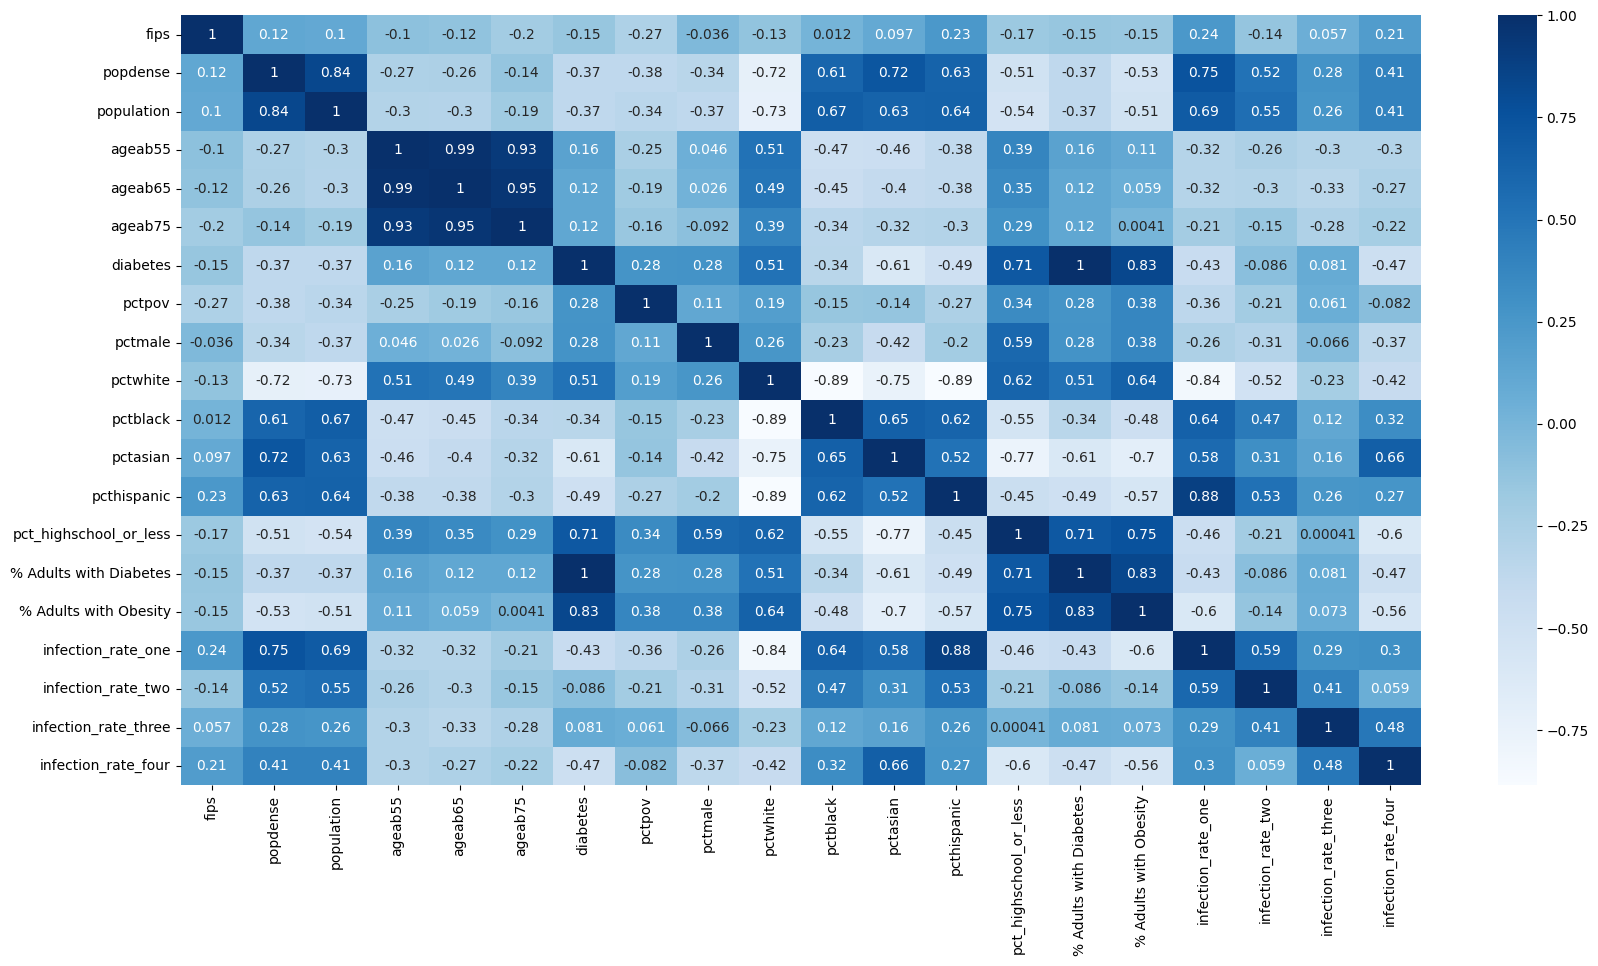

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(idf, cmap="Blues",annot=True)
plt.show()

Infection 1 == popdense,population, diabetes, 

In [52]:
IC = ['infection_rate_one', 'infection_rate_two',
       'infection_rate_three', 'infection_rate_four']

for j in IC:
    print("***********************************************************")
    for i in idf:
        if i =="infection_rate_one":
            break
        else:
            if (wavedemo[j].corr(wavedemo[i])>0.2):
                print("{} and {} : {}".format(i, j, wavedemo[j].corr(wavedemo[i])))

***********************************************************
fips and infection_rate_one : 0.23693817168100056
popdense and infection_rate_one : 0.7486830415151112
population and infection_rate_one : 0.6851375285936305
pctblack and infection_rate_one : 0.6418646264091644
pctasian and infection_rate_one : 0.5797505666048355
pcthispanic and infection_rate_one : 0.8822845901411636
***********************************************************
popdense and infection_rate_two : 0.520016903423084
population and infection_rate_two : 0.5476770966517551
pctblack and infection_rate_two : 0.46824274874139354
pctasian and infection_rate_two : 0.309349743379133
pcthispanic and infection_rate_two : 0.5276157644048503
***********************************************************
popdense and infection_rate_three : 0.28159509670502453
population and infection_rate_three : 0.264566335897457
pcthispanic and infection_rate_three : 0.2580142374390948
***********************************************************
f

In [57]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# You need to have the following data prepared beforehand: X_pca_df, wavedemo, and IC.

for i in IC:
    # Define the dependent variable and independent variables
    dependent_variable = i
    independent_variables = X_pca_df.columns.tolist()

    # Prepare the data
    X = X_pca_df[independent_variables]
    y = wavedemo[dependent_variable]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add a constant for the intercept term
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Train the model on the training set
    model = sm.OLS(y_train, X_train).fit()

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    print("Mean Squared Error for {}:".format(i), mse)

    # Print the p-values and significance of each independent variable
    print("\nP-values for {}:".format(i))
    print(model.pvalues)

    # Significance level: 0.05 (you can change this value based on your requirements)
    significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
    print("\nSignificant independent variables for {} at 0.05 level:".format(i))
    print(significant_vars)


    # Print the summary of the regression results
    # Print R-squared, AIC, and BIC
    print("R-squared:", model.rsquared)
    print("AIC:", model.aic)
    print("BIC:", model.bic)

    #print(model.summary())



Mean Squared Error for infection_rate_one: 3.786895726303717e-05

P-values for infection_rate_one:
const    5.902752e-13
PC1      9.285894e-13
PC2      2.653066e-01
PC3      1.723802e-05
PC4      2.440394e-01
dtype: float64

Significant independent variables for infection_rate_one at 0.05 level:
['const', 'PC1', 'PC3']
R-squared: 0.7496083580445204
AIC: -346.09876203062254
BIC: -337.06544958177096
Mean Squared Error for infection_rate_two: 0.0002616482073601753

P-values for infection_rate_two:
const    7.040115e-32
PC1      4.426580e-05
PC2      6.945421e-01
PC3      4.843095e-05
PC4      3.800817e-02
dtype: float64

Significant independent variables for infection_rate_two at 0.05 level:
['const', 'PC1', 'PC3', 'PC4']
R-squared: 0.4708873071741807
AIC: -253.96455146845437
BIC: -244.93123901960277
Mean Squared Error for infection_rate_three: 0.00023535841330317962

P-values for infection_rate_three:
const    2.840624e-38
PC1      3.898648e-01
PC2      5.044448e-02
PC3      3.834819e-01

In [53]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define the independent variables
independent_variables = ['popdense', 'population', 'ageab55', 'ageab65',
           'ageab75', 'diabetes', 'pctpov', 'pctmale', 'pctwhite', 'pctblack',
           'pctasian', 'pcthispanic', 'pct_highschool_or_less',
           '% Adults with Diabetes', '% Adults with Obesity']

# Prepare the data
X = wavedemo[independent_variables]
X = sm.add_constant(X)  # Adds a constant term to the predictor matrix

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF results
print(vif_data)


                   feature           VIF
0                    const  2.279651e+04
1                 popdense  6.053842e+00
2               population  4.252205e+00
3                  ageab55  7.145715e+01
4                  ageab65  8.344328e+01
5                  ageab75  1.544042e+01
6                 diabetes  2.370316e+14
7                   pctpov  3.461476e+00
8                  pctmale  2.901238e+00
9                 pctwhite  1.346876e+02
10                pctblack  2.638441e+01
11                pctasian  1.230491e+01
12             pcthispanic  3.987887e+01
13  pct_highschool_or_less  8.585570e+00
14  % Adults with Diabetes  2.370316e+14
15   % Adults with Obesity  6.420888e+00


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i in IC:
    # Define the dependent variable and independent variables
    dependent_variable = i
    independent_variables = X_pca_df.columns.tolist()

    # Prepare the data
    X = X_pca_df[independent_variables]
    y = wavedemo[dependent_variable]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    print("Mean Squared Error for {}:".format(i), mse)


Mean Squared Error for infection_rate_one: 3.786895726303726e-05
Mean Squared Error for infection_rate_two: 0.0002616482073601756
Mean Squared Error for infection_rate_three: 0.00023535841330318052
Mean Squared Error for infection_rate_four: 3.841077831850162e-05


In [58]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = wavedemo[['fips', 'popdense', 'population', 'ageab55', 'ageab65',
           'ageab75', 'diabetes', 'pctpov', 'pctmale', 'pctwhite', 'pctblack',
           'pctasian', 'pcthispanic', 'pct_highschool_or_less',
           '% Adults with Diabetes', '% Adults with Obesity']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=0.80)  # Keep 95% of the explained variance
X_pca = pca.fit_transform(X_scaled)

# Print the number of principal components
print("Number of principal components:", pca.n_components_)

# Create a DataFrame with the PCA results
X_pca_df = pd.DataFrame(data=X_pca, columns=["PC" + str(i) for i in range(1, pca.n_components_ + 1)])

# Print the transformed dataset
print(X_pca_df.head())

# Find the most important features for each principal component
components_df = pd.DataFrame(pca.components_, columns=x.columns, index=["PC" + str(i) for i in range(1, pca.n_components_ + 1)])
components_df_abs = components_df.abs()

for i in range(1, pca.n_components_ + 1):
    component = components_df_abs.loc["PC" + str(i)].sort_values(ascending=False)
    print(f"\nMost important features for PC{i}:")
    print(component.head())


Number of principal components: 4
        PC1       PC2       PC3       PC4
0  3.712730 -0.184782  0.374811 -2.222079
1 -1.920804 -0.749604  0.680112 -1.429182
2  0.333108  0.345165  0.082516 -2.326698
3 -2.564163 -1.002952 -0.600433 -1.396262
4 -1.631161 -0.246815 -0.360038 -0.404114

Most important features for PC1:
pctwhite                  0.334225
pctasian                  0.318126
pct_highschool_or_less    0.307171
% Adults with Obesity     0.289396
pcthispanic               0.287989
Name: PC1, dtype: float64

Most important features for PC2:
ageab65                  0.482232
ageab75                  0.481020
ageab55                  0.472182
pctpov                   0.296279
% Adults with Obesity    0.262629
Name: PC2, dtype: float64

Most important features for PC3:
diabetes                  0.426226
% Adults with Diabetes    0.426226
popdense                  0.388624
population                0.383827
pctblack                  0.280890
Name: PC3, dtype: float64

Most importan

In [59]:
ddf= wavedemo[['fips', 'popdense', 'population',
       'ageab75', 'diabetes', 'pctpov', 'pctblack',
       'pctasian', 'pcthispanic', 'pct_highschool_or_less',
       '% Adults with Diabetes', '% Adults with Obesity', 'death_rate_one',
       'death_rate_two', 'death_rate_three', 'death_rate_four']]

In [60]:
ddf = ddf.corr(method = "pearson")

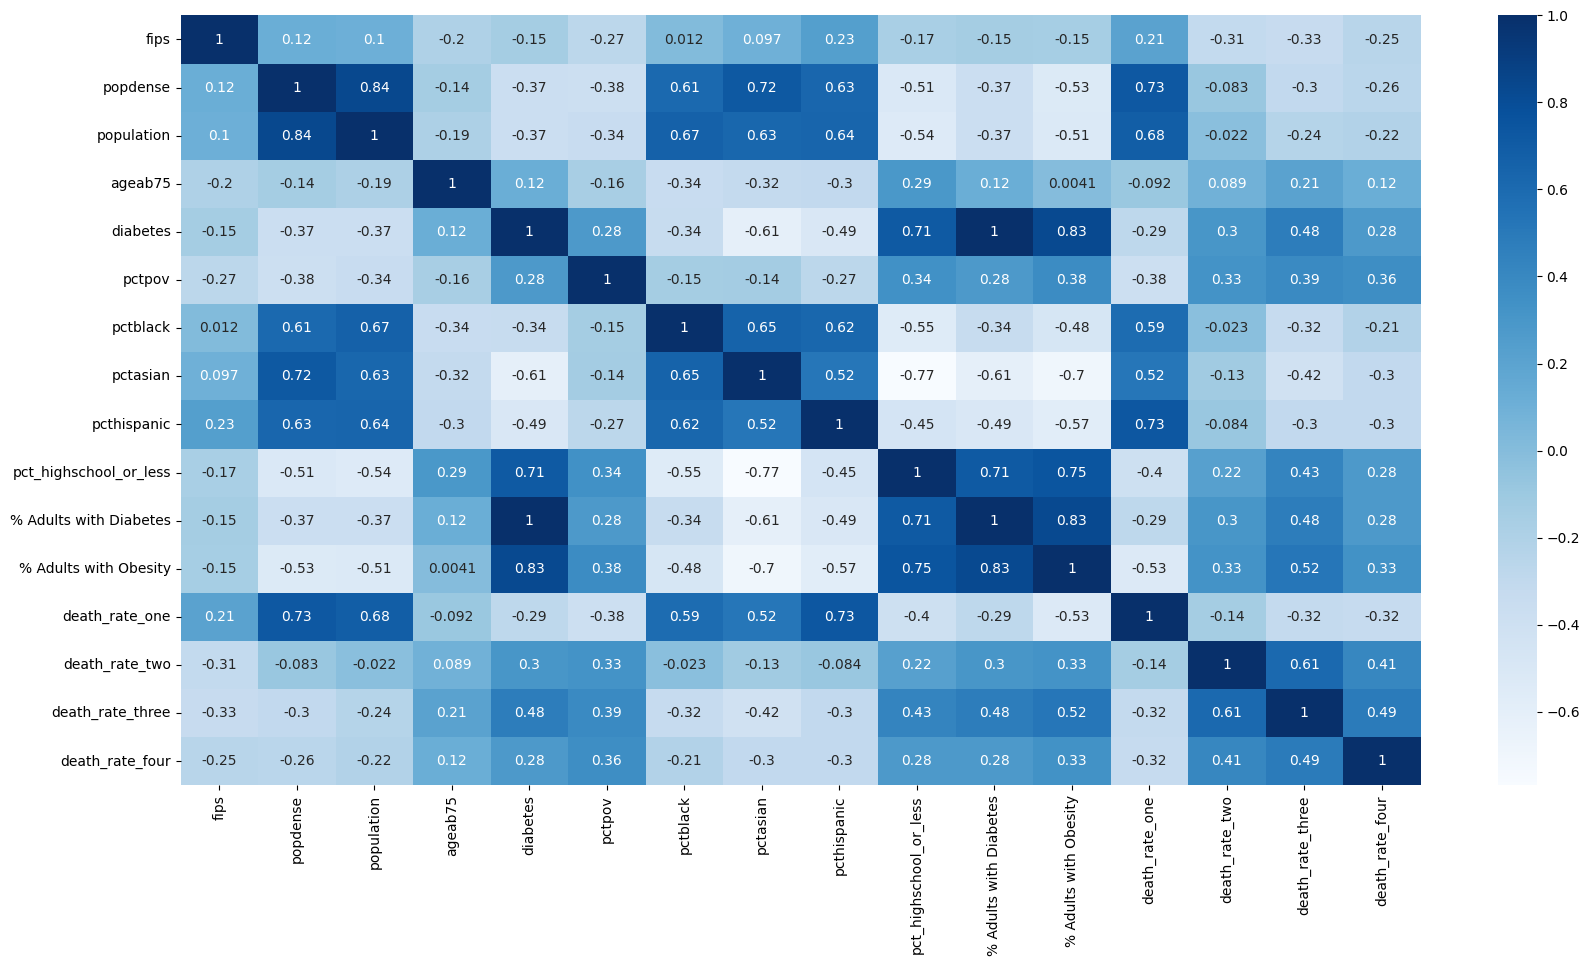

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(ddf, cmap="Blues",annot=True)
plt.show()

In [62]:
DC = ['death_rate_one', 'death_rate_two', 'death_rate_three', 'death_rate_four']

for j in DC:
    print("***********************************************************")
    for i in ddf:
        if i =="death_rate_one":
            break
        else:
            if (wavedemo[j].corr(wavedemo[i])>0.2):
                print("{} and {} : {}".format(i, j, wavedemo[j].corr(wavedemo[i])))

***********************************************************
fips and death_rate_one : 0.21099814308695067
popdense and death_rate_one : 0.7300165814474218
population and death_rate_one : 0.6829465903355584
pctblack and death_rate_one : 0.5909004340896302
pctasian and death_rate_one : 0.5223438166856134
pcthispanic and death_rate_one : 0.7342974097021787
***********************************************************
diabetes and death_rate_two : 0.3032728745253424
pctpov and death_rate_two : 0.3280776367514953
pct_highschool_or_less and death_rate_two : 0.2220480504294477
% Adults with Diabetes and death_rate_two : 0.303272881315738
% Adults with Obesity and death_rate_two : 0.3266149610681161
***********************************************************
ageab75 and death_rate_three : 0.2073649106714281
diabetes and death_rate_three : 0.4780132312040446
pctpov and death_rate_three : 0.38637204605110187
pct_highschool_or_less and death_rate_three : 0.43043952896795123
% Adults with Diabetes a

In [63]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# You need to have the following data prepared beforehand: X_pca_df, wavedemo, and IC.

for i in DC:
    # Define the dependent variable and independent variables
    dependent_variable = i
    independent_variables = X_pca_df.columns.tolist()

    # Prepare the data
    X = X_pca_df[independent_variables]
    y = wavedemo[dependent_variable]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add a constant for the intercept term
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Train the model on the training set
    model = sm.OLS(y_train, X_train).fit()

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    print("Mean Squared Error for {}:".format(i), mse)

    # Print the p-values and significance of each independent variable
    print("\nP-values for {}:".format(i))
    print(model.pvalues)

    # Significance level: 0.05 (you can change this value based on your requirements)
    significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
    print("\nSignificant independent variables for {} at 0.05 level:".format(i))
    print(significant_vars)


    # Print the summary of the regression results
    # Print R-squared, AIC, and BIC
    print("R-squared:", model.rsquared)
    print("AIC:", model.aic)
    print("BIC:", model.bic)

    #print(model.summary())



Mean Squared Error for death_rate_one: 3.7020053295729355e-08

P-values for death_rate_one:
const    6.231969e-11
PC1      1.938765e-08
PC2      1.748061e-01
PC3      1.639606e-05
PC4      3.751315e-01
dtype: float64

Significant independent variables for death_rate_one at 0.05 level:
['const', 'PC1', 'PC3']
R-squared: 0.6166200237772641
AIC: -605.9032107974238
BIC: -596.8698983485722
Mean Squared Error for death_rate_two: 1.850395848623341e-07

P-values for death_rate_two:
const    4.941457e-19
PC1      7.612977e-01
PC2      2.044019e-01
PC3      3.501058e-02
PC4      1.659380e-03
dtype: float64

Significant independent variables for death_rate_two at 0.05 level:
['const', 'PC3', 'PC4']
R-squared: 0.32345893221308963
AIC: -565.6424645815813
BIC: -556.6091521327297
Mean Squared Error for death_rate_three: 4.3494902709159596e-08

P-values for death_rate_three:
const    1.622989e-22
PC1      9.898791e-03
PC2      3.883021e-01
PC3      1.857865e-01
PC4      5.417173e-02
dtype: float64

Si

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i in DC:
    # Define the dependent variable and independent variables
    dependent_variable = i
    independent_variables = X_pca_df.columns.tolist()

    # Prepare the data
    X = X_pca_df[independent_variables]
    y = wavedemo[dependent_variable]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    print("Mean Squared Error for {}:".format(i), mse)


Mean Squared Error for death_rate_one: 3.70200532957295e-08
Mean Squared Error for death_rate_two: 1.850395848623341e-07
Mean Squared Error for death_rate_three: 4.349490270915957e-08
Mean Squared Error for death_rate_four: 1.297871791778062e-09


In [65]:
fdf = wavedemo[['fips', 'popdense', 'population',
       'ageab75', 'diabetes', 'pctpov', 'pctblack',
       'pctasian', 'pcthispanic', 'pct_highschool_or_less',
       '% Adults with Diabetes', '% Adults with Obesity', 'fatality_one',
       'fatality_two', 'fatality_three', 'fatality_four']]

In [66]:
fdf = fdf.corr(method="pearson")

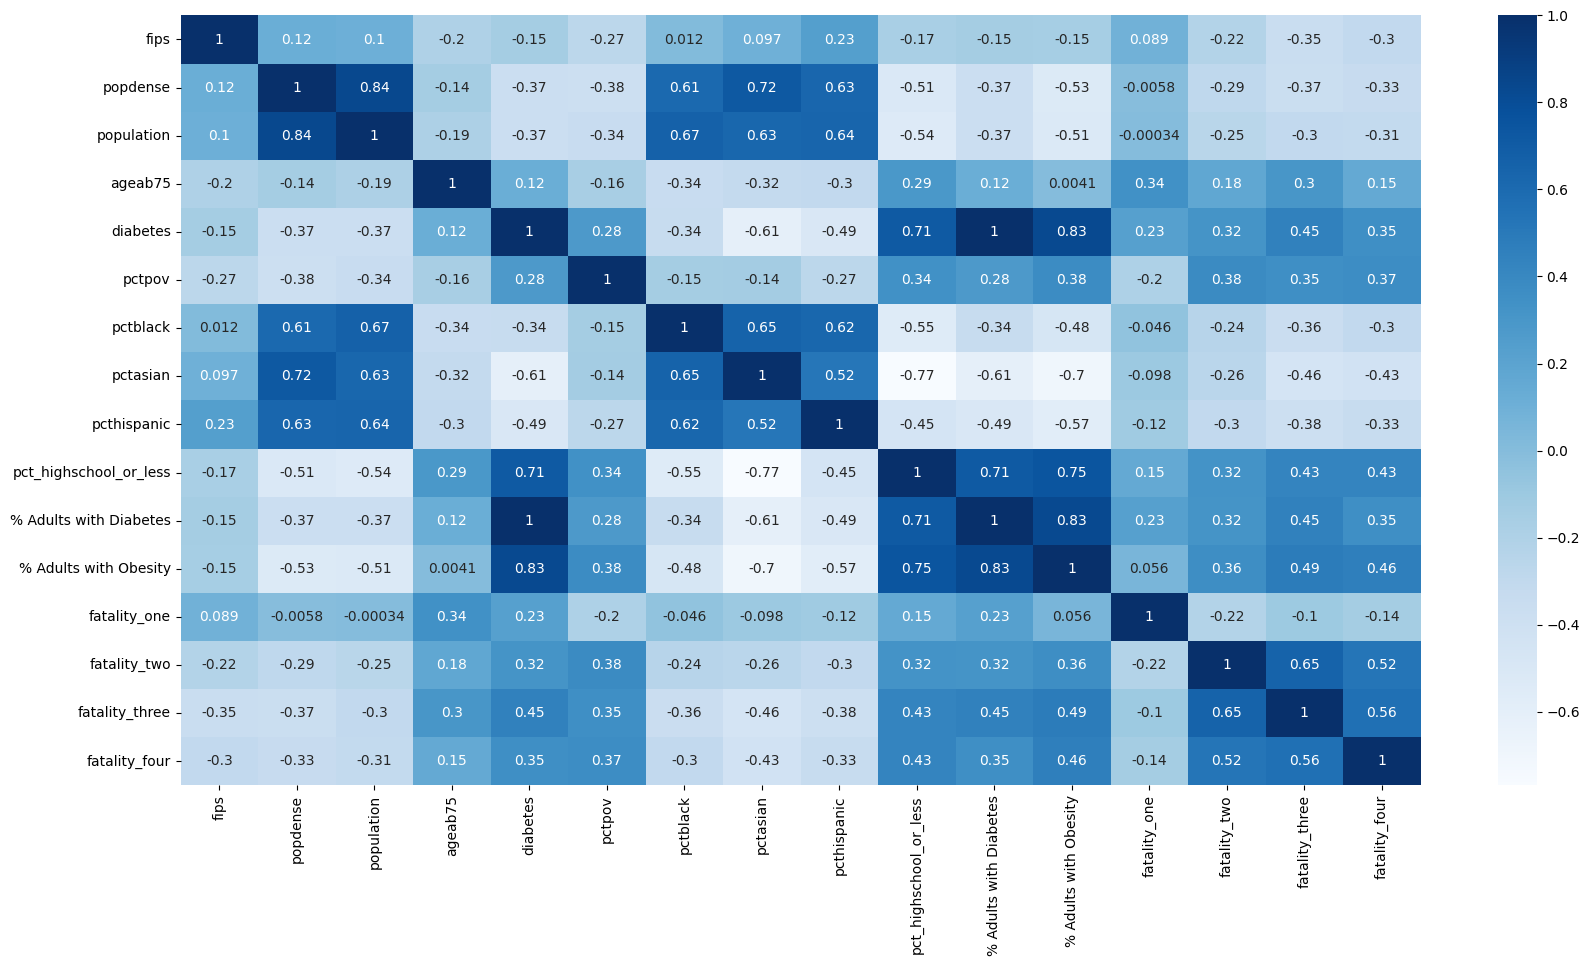

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(fdf, cmap="Blues",annot=True)
plt.show()

In [68]:
FC = ['fatality_one', 'fatality_two', 'fatality_three', 'fatality_four']

for j in FC:
    print("***********************************************************")
    for i in fdf:
        if i =="fatality_one":
            break
        else:
            if (wavedemo[j].corr(wavedemo[i])>0.2):
                print("{} and {} : {}".format(i, j, wavedemo[j].corr(wavedemo[i])))

***********************************************************
ageab75 and fatality_one : 0.3425254367083506
diabetes and fatality_one : 0.2305365575438511
% Adults with Diabetes and fatality_one : 0.23053655435877018
***********************************************************
diabetes and fatality_two : 0.3174013479770169
pctpov and fatality_two : 0.38455212253791643
pct_highschool_or_less and fatality_two : 0.3235929542388515
% Adults with Diabetes and fatality_two : 0.31740135267250175
% Adults with Obesity and fatality_two : 0.3594273271838048
***********************************************************
ageab75 and fatality_three : 0.30337892983330395
diabetes and fatality_three : 0.4487599818196888
pctpov and fatality_three : 0.3525642136185064
pct_highschool_or_less and fatality_three : 0.4318005025515236
% Adults with Diabetes and fatality_three : 0.4487599812101126
% Adults with Obesity and fatality_three : 0.48737862214104705
*******************************************************

In [69]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# You need to have the following data prepared beforehand: X_pca_df, wavedemo, and IC.

for i in FC:
    # Define the dependent variable and independent variables
    dependent_variable = i
    independent_variables = X_pca_df.columns.tolist()

    # Prepare the data
    X = X_pca_df[independent_variables]
    y = wavedemo[dependent_variable]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add a constant for the intercept term
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Train the model on the training set
    model = sm.OLS(y_train, X_train).fit()

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)

    print("Mean Squared Error for {}:".format(i), mse)

    # Print the p-values and significance of each independent variable
    print("\nP-values for {}:".format(i))
    print(model.pvalues)

    # Significance level: 0.05 (you can change this value based on your requirements)
    significant_vars = model.pvalues[model.pvalues < 0.05].index.tolist()
    print("\nSignificant independent variables for {} at 0.05 level:".format(i))
    print(significant_vars)


    # Print the summary of the regression results
    # Print R-squared, AIC, and BIC
    print("R-squared:", model.rsquared)
    print("AIC:", model.aic)
    print("BIC:", model.bic)

    #print(model.summary())



Mean Squared Error for fatality_one: 0.0005997210904835393

P-values for fatality_one:
const    1.412019e-09
PC1      4.208748e-01
PC2      6.453488e-02
PC3      3.489465e-02
PC4      6.991869e-01
dtype: float64

Significant independent variables for fatality_one at 0.05 level:
['const', 'PC3']
R-squared: 0.21064218232467535
AIC: -158.7233566419054
BIC: -149.6900441930538
Mean Squared Error for fatality_two: 9.77542295330914e-06

P-values for fatality_two:
const    1.006328e-19
PC1      6.256022e-02
PC2      3.797343e-01
PC3      7.414170e-01
PC4      4.819436e-02
dtype: float64

Significant independent variables for fatality_two at 0.05 level:
['const', 'PC4']
R-squared: 0.2103047536378856
AIC: -334.67040532537357
BIC: -325.637092876522
Mean Squared Error for fatality_three: 3.6094045860487828e-06

P-values for fatality_three:
const    6.698481e-24
PC1      2.491505e-03
PC2      9.315465e-01
PC3      2.838908e-01
PC4      6.271001e-02
dtype: float64

Significant independent variables 

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i in FC:
    # Define the dependent variable and independent variables
    dependent_variable = i
    independent_variables = X_pca_df.columns.to_list()

    # Prepare the data
    X = X_pca_df[independent_variables]
    y = wavedemo[dependent_variable]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    print("Mean Squared Error for {}:".format(i), mse)


Mean Squared Error for fatality_one: 0.0005997210904835393
Mean Squared Error for fatality_two: 9.77542295330914e-06
Mean Squared Error for fatality_three: 3.6094045860487815e-06
Mean Squared Error for fatality_four: 1.470416534504191e-06


| Variable           | Dependent | R-squared | Adj. R-squared | F-statistic | Prob (F-statistic) | AIC    | BIC    |
|--------------------|-----------|-----------|----------------|-------------|--------------------|--------|--------|
| death_rate_one     | OLS       | 0.703     | 0.654          | 14.24       | 2.28e-10           | -776.6 | -758.2 |
| death_rate_two     | OLS       | 0.308     | 0.193          | 2.671       | 0.0164             | -719.2 | -700.8 |
| death_rate_three   | OLS       | 0.439     | 0.346          | 4.700       | 0.000271           | -784.6 | -766.2 |
| death_rate_four    | OLS       | 0.220     | 0.090          | 1.690       | 0.125              | -944.7 | -926.3 |
|infection_rate_one|	OLS|	0.824 |	0.795 |	28.08|	1.32e-15|	-453.8|	-435.4|
infection_rate_two	|OLS	|0.545|	0.469	|7.180	|3.29e-06	|-331.4|	-313.0|
infection_rate_three|	OLS|	0.261	|0.138	|2.123|	0.0516|	-306.0	|-287.6|
infection_rate_four|	OLS|	0.505|	0.422|	6.116|	2.01e-05	|-439.3|	-420.9|



# Random Forest

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

for i in IC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error and R^2 score
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Model Summary for {i}:', model)
    print()


Mean Squared Error for infection_rate_one: 8.502262321264841e-06
R^2 Score for infection_rate_one: 0.8904902952798153
Model Summary for infection_rate_one: RandomForestRegressor(random_state=42)

Mean Squared Error for infection_rate_two: 0.00012768457274241166
R^2 Score for infection_rate_two: 0.04002696663509675
Model Summary for infection_rate_two: RandomForestRegressor(random_state=42)

Mean Squared Error for infection_rate_three: 0.00029031454899365806
R^2 Score for infection_rate_three: 0.017899424370212413
Model Summary for infection_rate_three: RandomForestRegressor(random_state=42)

Mean Squared Error for infection_rate_four: 3.1955795065102115e-05
R^2 Score for infection_rate_four: 0.4111404148721455
Model Summary for infection_rate_four: RandomForestRegressor(random_state=42)



In [72]:
for i in DC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error and R^2 score
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Model Summary for {i}:', model)
    print()

Mean Squared Error for death_rate_one: 3.205240450453522e-08
R^2 Score for death_rate_one: 0.8137003851147728
Model Summary for death_rate_one: RandomForestRegressor(random_state=42)

Mean Squared Error for death_rate_two: 9.543663166183927e-08
R^2 Score for death_rate_two: -0.4604082669177121
Model Summary for death_rate_two: RandomForestRegressor(random_state=42)

Mean Squared Error for death_rate_three: 5.0886033630876046e-08
R^2 Score for death_rate_three: 0.4148818766783813
Model Summary for death_rate_three: RandomForestRegressor(random_state=42)

Mean Squared Error for death_rate_four: 1.205255008236217e-09
R^2 Score for death_rate_four: 0.33901004219069764
Model Summary for death_rate_four: RandomForestRegressor(random_state=42)



In [73]:
for i in FC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error and R^2 score
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Model Summary for {i}:', model)
    print()

Mean Squared Error for fatality_one: 0.000662138979315727
R^2 Score for fatality_one: -0.1040767855215805
Model Summary for fatality_one: RandomForestRegressor(random_state=42)

Mean Squared Error for fatality_two: 9.665065608092999e-06
R^2 Score for fatality_two: 0.09120443425359659
Model Summary for fatality_two: RandomForestRegressor(random_state=42)

Mean Squared Error for fatality_three: 4.22138076248203e-06
R^2 Score for fatality_three: 0.38092947807488464
Model Summary for fatality_three: RandomForestRegressor(random_state=42)

Mean Squared Error for fatality_four: 1.8359072616798062e-06
R^2 Score for fatality_four: 0.427521383420583
Model Summary for fatality_four: RandomForestRegressor(random_state=42)



# SVM

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score

for i in IC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline for preprocessing and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', svm.SVR())
    ])

    # Define the hyperparameters to be tuned
    param_grid = {
        'svr__kernel': ['linear', 'poly', 'rbf'],
        'svr__C': [0.1, 1, 10],
        'svr__epsilon': [0.1, 1, 10]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Train the SVM model with the best hyperparameters
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_pipeline.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error, R^2 score, and best hyperparameters
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Best Hyperparameters for {i}:', grid_search.best_params_)
    print()


Mean Squared Error for infection_rate_one: 0.00024428467467097604
R^2 Score for infection_rate_one: -2.1464028725598396
Best Hyperparameters for infection_rate_one: {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}

Mean Squared Error for infection_rate_two: 0.00014289565443033523
R^2 Score for infection_rate_two: -0.07433476019760032
Best Hyperparameters for infection_rate_two: {'svr__C': 0.1, 'svr__epsilon': 10, 'svr__kernel': 'linear'}

Mean Squared Error for infection_rate_three: 0.0003605586736391026
R^2 Score for infection_rate_three: -0.21972833313638307
Best Hyperparameters for infection_rate_three: {'svr__C': 0.1, 'svr__epsilon': 10, 'svr__kernel': 'linear'}

Mean Squared Error for infection_rate_four: 7.280257984387586e-05
R^2 Score for infection_rate_four: -0.3415562615720902
Best Hyperparameters for infection_rate_four: {'svr__C': 0.1, 'svr__epsilon': 1, 'svr__kernel': 'linear'}



In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score

for i in DC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline for preprocessing and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', svm.SVR())
    ])

    # Define the hyperparameters to be tuned
    param_grid = {
        'svr__kernel': ['linear', 'poly', 'rbf'],
        'svr__C': [0.1, 1, 10],
        'svr__epsilon': [0.1, 1, 10]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Train the SVM model with the best hyperparameters
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_pipeline.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error, R^2 score, and best hyperparameters
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Best Hyperparameters for {i}:', grid_search.best_params_)
    print()


Mean Squared Error for death_rate_one: 3.1505894313401273e-07
R^2 Score for death_rate_one: -0.831231094182286
Best Hyperparameters for death_rate_one: {'svr__C': 0.1, 'svr__epsilon': 1, 'svr__kernel': 'linear'}

Mean Squared Error for death_rate_two: 2.2259804880335697e-07
R^2 Score for death_rate_two: -2.4062814771590584
Best Hyperparameters for death_rate_two: {'svr__C': 0.1, 'svr__epsilon': 1, 'svr__kernel': 'linear'}

Mean Squared Error for death_rate_three: 8.888482074966914e-08
R^2 Score for death_rate_three: -0.02205095972086135
Best Hyperparameters for death_rate_three: {'svr__C': 0.1, 'svr__epsilon': 10, 'svr__kernel': 'linear'}

Mean Squared Error for death_rate_four: 1.8510264067650638e-09
R^2 Score for death_rate_four: -0.01514605469430208
Best Hyperparameters for death_rate_four: {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}



In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score

for i in FC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline for preprocessing and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', svm.SVR())
    ])

    # Define the hyperparameters to be tuned
    param_grid = {
        'svr__kernel': ['linear', 'poly', 'rbf'],
        'svr__C': [0.1, 1, 10],
        'svr__epsilon': [0.1, 1, 10]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Train the SVM model with the best hyperparameters
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_pipeline.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error, R^2 score, and best hyperparameters
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Best Hyperparameters for {i}:', grid_search.best_params_)
    print()


Mean Squared Error for fatality_one: 0.002854619404265175
R^2 Score for fatality_one: -3.759905569984263
Best Hyperparameters for fatality_one: {'svr__C': 0.1, 'svr__epsilon': 0.1, 'svr__kernel': 'linear'}

Mean Squared Error for fatality_two: 2.6809561798728168e-05
R^2 Score for fatality_two: -1.520873822303586
Best Hyperparameters for fatality_two: {'svr__C': 0.1, 'svr__epsilon': 10, 'svr__kernel': 'linear'}

Mean Squared Error for fatality_three: 7.186758965088539e-06
R^2 Score for fatality_three: -0.053946770926069476
Best Hyperparameters for fatality_three: {'svr__C': 0.1, 'svr__epsilon': 10, 'svr__kernel': 'linear'}

Mean Squared Error for fatality_four: 5.119573702710795e-06
R^2 Score for fatality_four: -0.5964022431735432
Best Hyperparameters for fatality_four: {'svr__C': 0.1, 'svr__epsilon': 10, 'svr__kernel': 'linear'}



# Gradient Boosting

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

for i in IC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline for preprocessing and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gbr', GradientBoostingRegressor())
    ])

    # Define the hyperparameters to be tuned
    param_grid = {
        'gbr__n_estimators': [100, 200],
        'gbr__learning_rate': [0.01, 0.5],
        'gbr__max_depth': [5, 8],
        'gbr__subsample': [0.8, 1],
        'gbr__random_state': [42]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Train the Gradient Boosting model with the best hyperparameters
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_pipeline.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error, R^2 score, and best hyperparameters
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Best Hyperparameters for {i}:', grid_search.best_params_)
    print()


Mean Squared Error for infection_rate_one: 9.737939267712112e-06
R^2 Score for infection_rate_one: 0.874574693946681
Best Hyperparameters for infection_rate_one: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 5, 'gbr__n_estimators': 200, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for infection_rate_two: 0.00012775594617060938
R^2 Score for infection_rate_two: 0.03949035861036043
Best Hyperparameters for infection_rate_two: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 5, 'gbr__n_estimators': 200, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for infection_rate_three: 0.0002633712604033296
R^2 Score for infection_rate_three: 0.10904545658129239
Best Hyperparameters for infection_rate_three: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 5, 'gbr__n_estimators': 100, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for infection_rate_four: 3.276644933000208e-05
R^2 Score for infection_rate_four: 0.3962022312613602
Best Hyp

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

for i in DC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline for preprocessing and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gbr', GradientBoostingRegressor())
    ])

    # Define the hyperparameters to be tuned
    param_grid = {
        'gbr__n_estimators': [100, 200],
        'gbr__learning_rate': [0.01, 0.1],
        'gbr__max_depth': [3, 4],
        'gbr__subsample': [0.8, 1.0],
        'gbr__random_state': [42]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Train the Gradient Boosting model with the best hyperparameters
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_pipeline.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error, R^2 score, and best hyperparameters
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Best Hyperparameters for {i}:', grid_search.best_params_)
    print()


Mean Squared Error for death_rate_one: 3.097332724882502e-08
R^2 Score for death_rate_one: 0.8199723537947442
Best Hyperparameters for death_rate_one: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 3, 'gbr__n_estimators': 200, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for death_rate_two: 8.192430473132261e-08
R^2 Score for death_rate_two: -0.25363741162869524
Best Hyperparameters for death_rate_two: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 3, 'gbr__n_estimators': 100, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for death_rate_three: 4.564704818031209e-08
R^2 Score for death_rate_three: 0.4751228724136677
Best Hyperparameters for death_rate_three: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 4, 'gbr__n_estimators': 100, 'gbr__random_state': 42, 'gbr__subsample': 1.0}

Mean Squared Error for death_rate_four: 1.5378665413553446e-09
R^2 Score for death_rate_four: 0.15659811961753645
Best Hyperparameters for death_rate_four: {'gbr__l

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

for i in FC:
    # Specify the independent and dependent variables
    X = wavedemo[['fips', 'popdense', 'population', 'ageab75', 'diabetes', 'pctpov', 'pctblack', 'pctasian', 'pcthispanic', 'pct_highschool_or_less', '% Adults with Diabetes', '% Adults with Obesity']]
    y = wavedemo[i]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a pipeline for preprocessing and model training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('gbr', GradientBoostingRegressor())
    ])

    # Define the hyperparameters to be tuned
    param_grid = {
        'gbr__n_estimators': [100, 200],
        'gbr__learning_rate': [0.01, 0.1],
        'gbr__max_depth': [3, 4],
        'gbr__subsample': [0.8, 1.0],
        'gbr__random_state': [42]
    }

    # Perform a grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Train the Gradient Boosting model with the best hyperparameters
    best_pipeline = grid_search.best_estimator_
    best_pipeline.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = best_pipeline.predict(X_test)

    # Calculate the mean squared error and R^2 score of the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display the mean squared error, R^2 score, and best hyperparameters
    print(f'Mean Squared Error for {i}:', mse)
    print(f'R^2 Score for {i}:', r2)
    print(f'Best Hyperparameters for {i}:', grid_search.best_params_)
    print()


Mean Squared Error for fatality_one: 0.0005743591783184348
R^2 Score for fatality_one: 0.04229073481224688
Best Hyperparameters for fatality_one: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 4, 'gbr__n_estimators': 100, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for fatality_two: 8.652035703360003e-06
R^2 Score for fatality_two: 0.18645853005807367
Best Hyperparameters for fatality_two: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 3, 'gbr__n_estimators': 100, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for fatality_three: 5.146229215442533e-06
R^2 Score for fatality_three: 0.24529934976130963
Best Hyperparameters for fatality_three: {'gbr__learning_rate': 0.01, 'gbr__max_depth': 3, 'gbr__n_estimators': 100, 'gbr__random_state': 42, 'gbr__subsample': 0.8}

Mean Squared Error for fatality_four: 2.0878831758026688e-06
R^2 Score for fatality_four: 0.3489494284317428
Best Hyperparameters for fatality_four: {'gbr__learning_rate': 0.01, 'gb

## Normality Test

In [80]:
from scipy.stats import shapiro

data = wavedemo

# Define the columns to test
columns = ['fips', 'cases_one', 'deaths_one', 'cases_two',
       'deaths_two', 'cases_three', 'deaths_three', 'cases_four',
       'deaths_four', 'popdense', 'population', 'ageab55', 'ageab65',
       'ageab75', 'diabetes', 'pctpov', 'pctmale', 'pctwhite', 'pctblack',
       'pctasian', 'pcthispanic', 'pct_highschool_or_less',
       '% Adults with Diabetes', '% Adults with Obesity', 'Total_cases',
       'Total_deaths', 'infection_rate_one', 'infection_rate_two',
       'infection_rate_three', 'infection_rate_four', 'death_rate_one',
       'death_rate_two', 'death_rate_three', 'death_rate_four', 'fatality_one',
       'fatality_two', 'fatality_three', 'fatality_four', 'lat', 'lng',
       'death_cluster', 'D1 Cluster', 'D2 Cluster', 'D3 Cluster', 'D4 Cluster',
       'infection_cluster', 'I1 Cluster', 'I2 Cluster', 'I3 Cluster',
       'I4 Cluster', 'fatality_cluster', 'F1 Cluster', 'F2 Cluster',
       'F3 Cluster', 'F4 Cluster']

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Column', 'Shapiro-Wilk Test Statistic', 'p-value', 'Normal?'])

# Loop over the columns and perform the Shapiro-Wilk test
for col in columns:
    col_data = data[col].dropna()
    if col_data.empty:
        print(f"{col} not found in the dataset")
        continue
    stat, p = shapiro(col_data)
    if p > 0.05:
        normal = 'Yes'
    else:
        normal = 'No'
    results_df = results_df.append({'Column': col, 'Shapiro-Wilk Test Statistic': stat, 'p-value': p, 'Normal?': normal}, ignore_index=True)


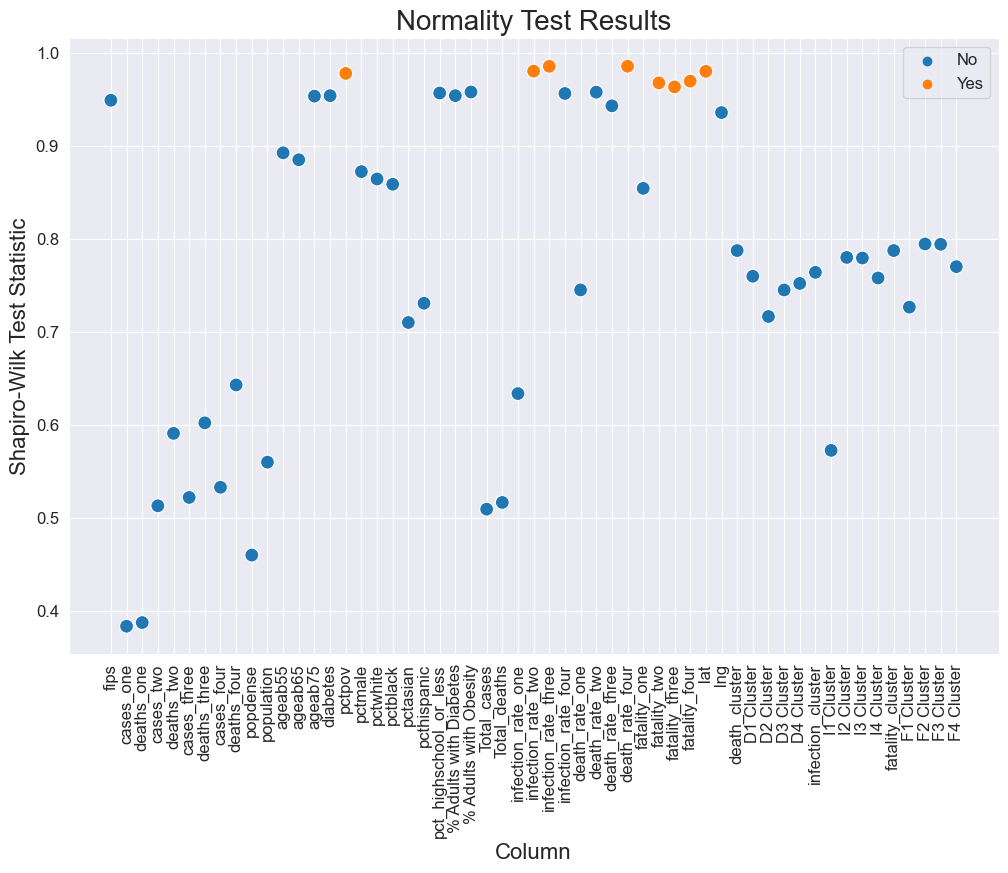

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Column', y='Shapiro-Wilk Test Statistic', hue='Normal?', data=results_df, s=100)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Column', fontsize=16)
plt.ylabel('Shapiro-Wilk Test Statistic', fontsize=16)
plt.title('Normality Test Results', fontsize=20)
plt.legend(fontsize=12)
plt.show()

# End